In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
def mW_to_dBm(pow_mW):
    return 10 * np.log10(pow_mW)

def dBm_to_mW(pow_dBm):
    return 10**(pow_dBm/10) 

Text(0.5, 0, 'Tension [V]')

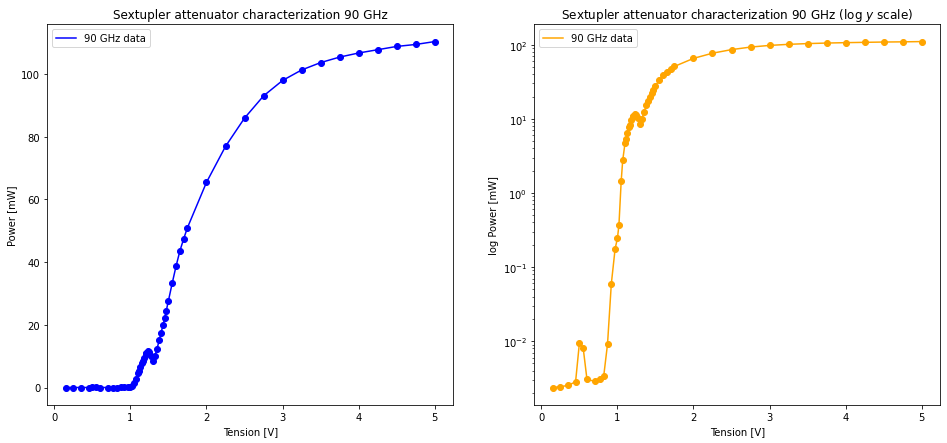

In [3]:
# read the data:
filename = '10_09_24_90GHz.txt'
V_att, out_pow = np.loadtxt(filename,skiprows=6,unpack=True)

# plot:
fig,ax = plt.subplots(figsize=(16,7),ncols=2)

ax[0].plot(V_att,out_pow,color='blue',label='90 GHz data')
ax[0].scatter(V_att,out_pow,color='blue')
ax[0].legend()
ax[0].set_title('Sextupler attenuator characterization 90 GHz')
ax[0].set_ylabel(r'Power [mW]')
ax[0].set_xlabel('Tension [V]')
ax[1].plot(V_att,out_pow,color='orange',label='90 GHz data')
ax[1].scatter(V_att,out_pow,color='orange')
ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_title('Sextupler attenuator characterization 90 GHz (log $y$ scale)')
ax[1].set_ylabel(r'log Power [mW]')
ax[1].set_xlabel('Tension [V]')

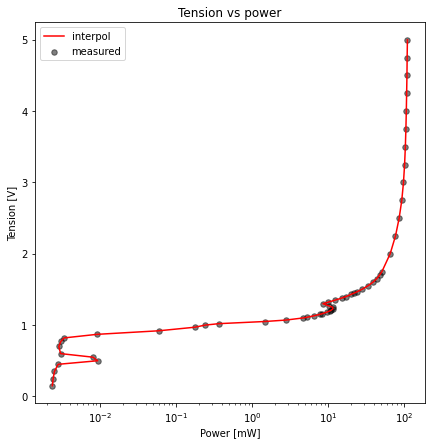

In [4]:
# interpolation
inv_interpol_mW = scipy.interpolate.interp1d(out_pow,V_att)

# plot:
fig = plt.figure(figsize=(7,7))
plt.scatter(out_pow,V_att,color='black',label='measured',s=30,alpha=0.5)
plt.plot(out_pow,inv_interpol_mW(out_pow),color='red',label='interpol')
plt.title('Tension vs power')
plt.xscale('log')
plt.xlabel('Power [mW]')
plt.ylabel('Tension [V]')
plt.legend()

In [5]:
# extrapolate the tension value based on the desired power
desired_power_mW = 110.3 #mW
tension_value_mW = inv_interpol_mW(desired_power_mW)
print('Tension value to get %.5f mW: %.2f V'%(desired_power_mW,tension_value_mW))

Tension value to get 110.30000 mW: 5.00 V


In [6]:
mW_to_dBm(6)

7.781512503836437

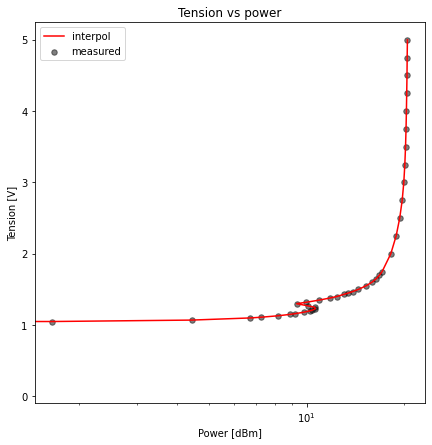

In [7]:
# interpolation in dB:
out_pow_dBm = mW_to_dBm(out_pow) # conversion from mW to dBm
inv_interpol_dBm = scipy.interpolate.interp1d(out_pow_dBm,V_att)

# plot:
fig = plt.figure(figsize=(7,7))
plt.scatter(out_pow_dBm,V_att,color='black',label='measured',s=30,alpha=0.5)
plt.plot(out_pow_dBm,inv_interpol_dBm(out_pow_dBm),color='red',label='interpol')
plt.title('Tension vs power')
plt.xscale('log')
plt.xlabel('Power [dBm]')
plt.ylabel('Tension [V]')
plt.legend()

In [8]:
# extrapolate the tension value based on the desired power
desired_power_dBm = 5 #dBm
tension_value_dBm = inv_interpol_dBm(desired_power_dBm)
print('Tension value to get %.5f dBm: %.2f V'%(desired_power_dBm,tension_value_dBm))

Tension value to get 5.00000 dBm: 1.08 V


In [9]:
dBm_to_mW(-13)

0.05011872336272722

In [11]:
mW_to_dBm(0.003)

-25.228787452803374